# Basic Classification (using tensorflow tutorial)

In [1]:
import tensorflow as tf

In [2]:
import numpy as np 
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.16.1


In [5]:
fashion_mnist = tf.keras.datasets.mnist

In [6]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [7]:
#labels are in 0-9 corresponding to class_names are
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape #28×28 pixels

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
train_labels.shape

(60000,)

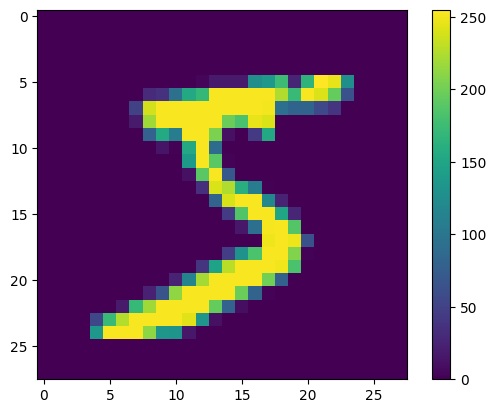

In [11]:
plt.imshow(train_images[0])
plt.colorbar()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

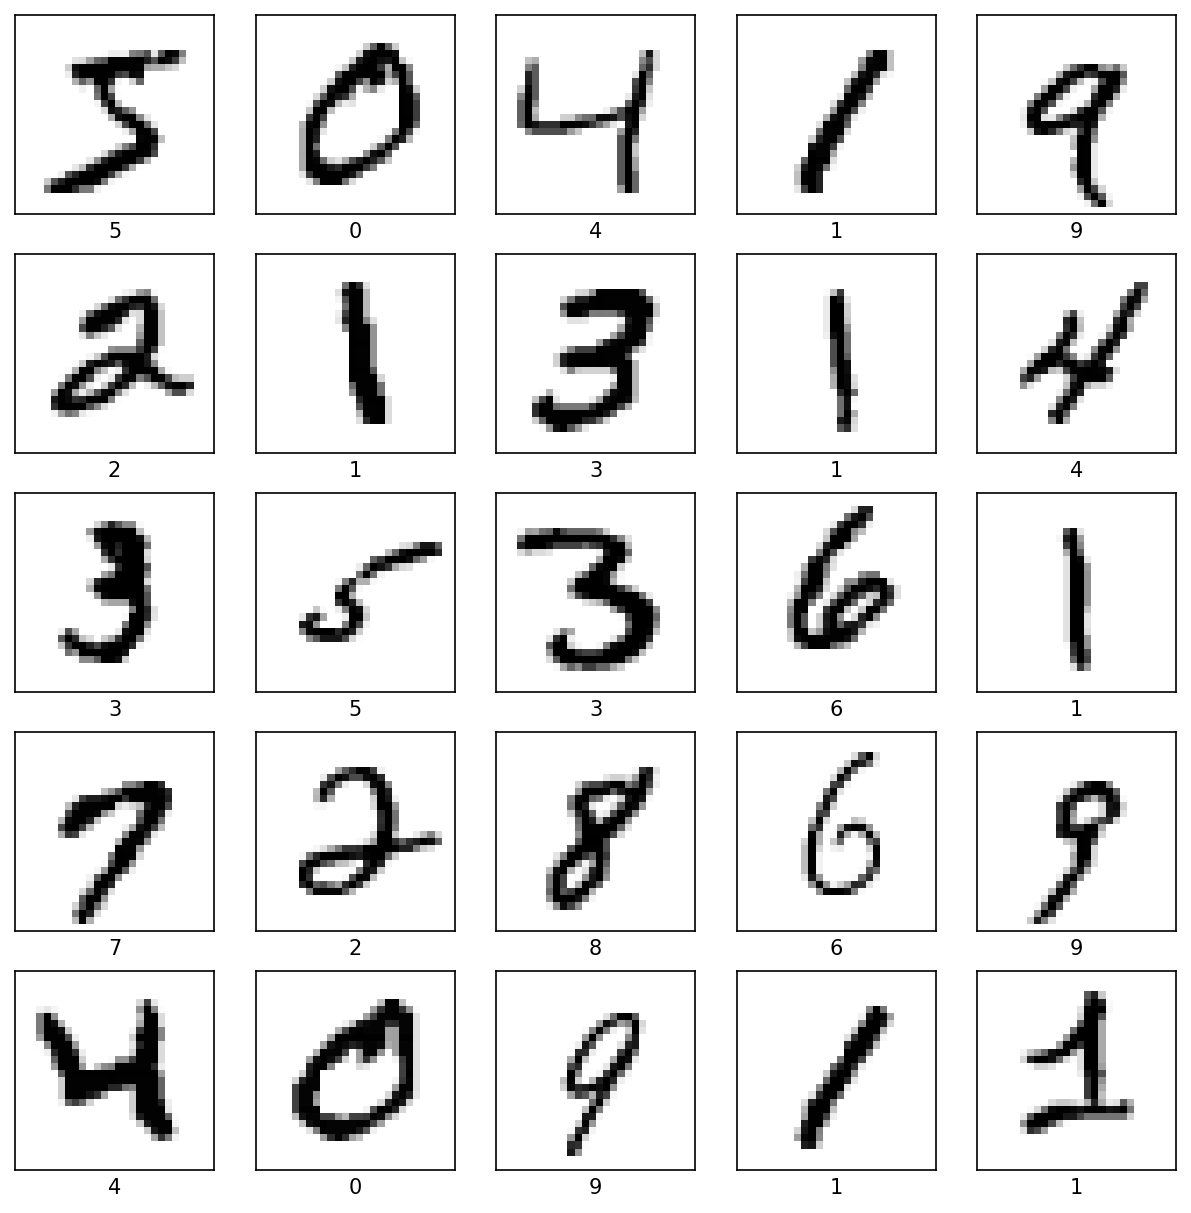

In [13]:
plt.figure(figsize=(10,10),dpi=150)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [14]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8772 - loss: 0.4357
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9640 - loss: 0.1253
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9759 - loss: 0.0802
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0594
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9863 - loss: 0.0454
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9901 - loss: 0.0339
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9921 - loss: 0.0272
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9934 - loss: 0.0210
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9948 - loss: 0.0167
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9959 - loss: 0.0151


In [17]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9732 - loss: 0.0976

Test accuracy: 0.9732000231742859


In [18]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
predictions[0]

array([2.8592886e-10, 9.3403388e-13, 2.0309978e-08, 1.1460592e-06,
       2.1724380e-17, 4.4290214e-12, 6.9411455e-18, 9.9999881e-01,
       1.4991369e-10, 1.4974066e-08], dtype=float32)

In [21]:
np.argmax(predictions[0])

7

In [22]:
test_labels[0]

7